In [1]:
import os
import pandas as pd
import numpy as np

# metric
def metric(label, pred):
    assert label.shape == pred.shape
    with np.errstate(divide = 'ignore', invalid = 'ignore'):
        # mask = np.not_equal(label, 0)
        mask = label > 1e-3
        mask = mask.astype(np.float32)
        mask /= np.mean(mask)
        mae = np.abs(np.subtract(pred, label)).astype(np.float32)
        rmse = np.square(mae)
        mape = np.divide(mae, label)
        mae = np.nan_to_num(mae * mask)
        mae = np.mean(mae)
        rmse = np.nan_to_num(rmse * mask)
        rmse = np.sqrt(np.mean(rmse))
        mape = np.nan_to_num(mape * mask)
        mape = np.mean(mape)
    return mae, rmse, mape

In [2]:
la_df = pd.read_hdf('../../dataset/metr-la/metr-la.h5')
bay_df = pd.read_hdf('../../dataset/pems-bay/pems-bay.h5')
d7_df = pd.read_hdf('../../dataset/pemsd7/pemsd7.h5')

In [3]:
datasets = ['metr-la', 'pems-bay', 'pemsd7']
model_names = ['MyUAGCRN', 'MyUAGCTransformer'] ## ['MyUAGCRN']
graph_types = ['cooccur_dist', 'legacy'] #['cooccur_dist']#'cooccur_dist', 'legacy']

AEs = ['AE', 'TE', 'none']
SEs = ['SE', 'none']

for dataset in datasets:
    myheader = '\t'.join([
        '',
        'model',
        'graph',
        'AE',
        'SE',
        'MAE3',
        'RMSE3',
        'MAPE3',
        'MAE6',
        'RMSE6',
        'MAPE6',
        'MAEL',
        'RMSEL',
        'MAPEL',
    ])
    print(myheader)
    ground_truth = np.load(f'./{dataset}/ground_truth.npy')
    for model_name in model_names:
        for AE in AEs:
            for SE in SEs:
                for graph in graph_types:
                    graph_str = (graph + ' '*100)[:7]
                    model_name_str = model_name #(model_name + ' '*100)[:7]
#                     print(model_name)
                    dataset_str = (dataset + ' '*100)[:7]
                    fname = f'./{dataset}/{dataset}_{model_name}_G-{graph}_AE-{AE}_SE-{SE}.npy'
                    header = f'{dataset_str}\t{model_name_str}\t{graph_str}\t{AE}\t{SE}'
                    if os.path.isfile(fname):
                        prediction = np.load(fname)
                        total_evaluation_str = ''
                        for Q in [3-1, 6-1, -1]:
                            evaluation = metric(ground_truth[:, Q, ...], prediction[:, Q, ...])
                            evaluation_str = '\t'.join(f'{v:.2f}' for v in evaluation[:2])
                            evaluation_str += '\t' + f'{evaluation[2]:.2%}'
#                             v1, v2, v3 = evaluation
#                             evaluation_str = ' / '.join([f'{v1:.2f}',f'{v2:.2f}', f'{v3:.2%}'])
                            total_evaluation_str += '\t' + evaluation_str
                        print(header + total_evaluation_str)
#                         break
#                     else:
#                         print(header)
#     print('---------')

	model	graph	AE	SE	MAE3	RMSE3	MAPE3	MAE6	RMSE6	MAPE6	MAEL	RMSEL	MAPEL
metr-la	MyUAGCRN	cooccur	AE	SE	2.64	5.09	6.77%	2.97	6.08	8.10%	3.35	7.12	9.68%
metr-la	MyUAGCRN	legacy 	AE	SE	2.66	5.16	6.93%	3.01	6.16	8.33%	3.39	7.22	9.98%
metr-la	MyUAGCRN	cooccur	AE	none	2.74	5.26	7.12%	3.13	6.31	8.67%	3.60	7.42	10.54%
metr-la	MyUAGCRN	legacy 	AE	none	2.80	5.35	7.34%	3.22	6.43	9.02%	3.72	7.59	11.05%
metr-la	MyUAGCRN	cooccur	TE	SE	2.62	5.00	6.70%	2.94	5.97	8.04%	3.31	7.02	9.67%
metr-la	MyUAGCRN	cooccur	none	SE	2.68	5.14	6.80%	3.08	6.22	8.25%	3.56	7.44	10.01%
metr-la	MyUAGCRN	legacy 	none	SE	2.72	5.21	7.02%	3.11	6.31	8.54%	3.62	7.57	10.45%
metr-la	MyUAGCRN	cooccur	none	none	2.79	5.32	7.21%	3.22	6.42	8.80%	3.80	7.72	10.93%
metr-la	MyUAGCRN	legacy 	none	none	2.85	5.43	7.43%	3.31	6.56	9.16%	3.96	7.94	11.57%
metr-la	MyUAGCTransformer	cooccur	AE	SE	2.63	5.07	6.71%	2.96	6.04	8.08%	3.34	7.02	9.65%
metr-la	MyUAGCTransformer	legacy 	AE	SE	2.66	5.16	6.88%	3.01	6.15	8.33%	3.41	7.20	10.07%
metr-la	MyUAGCTransf

In [4]:
datasets = ['metr-la', 'pems-bay', 'pemsd7']
model_names = ['MyARLSTM', 'MyTransformer'] ## ['MyUAGCRN']
graph_types = ['none'] #['cooccur_dist']#'cooccur_dist', 'legacy']

AEs = ['AE', 'TE', 'none']
SEs = ['SE', 'none']

for dataset in datasets:
    myheader = '\t'.join([
        '',
        'model',
        'graph',
        'AE',
        'SE',
        'MAE3',
        'RMSE3',
        'MAPE3',
        'MAE6',
        'RMSE6',
        'MAPE6',
        'MAEL',
        'RMSEL',
        'MAPEL',
    ])
    print(myheader)
    ground_truth = np.load(f'./{dataset}/ground_truth.npy')
    for model_name in model_names:
        for AE in AEs:
            for SE in SEs:
                for graph in graph_types:
                    graph_str = (graph + ' '*100)[:7]
                    model_name_str = model_name #(model_name + ' '*100)[:7]
#                     print(model_name)
                    dataset_str = (dataset + ' '*100)[:7]
                    fname = f'./{dataset}/{dataset}_{model_name}_G-{graph}_AE-{AE}_SE-{SE}.npy'
                    header = f'{dataset_str}\t{model_name_str}\t{graph_str}\t{AE}\t{SE}'
                    if os.path.isfile(fname):
                        prediction = np.load(fname)
                        total_evaluation_str = ''
                        for Q in [3-1, 6-1, -1]:
                            evaluation = metric(ground_truth[:, Q, ...], prediction[:, Q, ...])
                            evaluation_str = '\t'.join(f'{v:.2f}' for v in evaluation[:2])
                            evaluation_str += '\t' + f'{evaluation[2]:.2%}'
#                             v1, v2, v3 = evaluation
#                             evaluation_str = ' / '.join([f'{v1:.2f}',f'{v2:.2f}', f'{v3:.2%}'])
                            total_evaluation_str += '\t' + evaluation_str
                        print(header + total_evaluation_str)
#                         break
#                     else:
#                         print(header)
#     print('---------')

	model	graph	AE	SE	MAE3	RMSE3	MAPE3	MAE6	RMSE6	MAPE6	MAEL	RMSEL	MAPEL
metr-la	MyARLSTM	none   	AE	SE	2.82	5.56	7.54%	3.19	6.59	9.06%	3.56	7.55	10.59%
metr-la	MyARLSTM	none   	AE	none	2.97	5.86	7.95%	3.54	7.21	10.23%	4.34	8.83	13.52%
metr-la	MyARLSTM	none   	none	SE	2.97	5.92	7.91%	3.58	7.42	10.23%	4.49	9.31	13.89%
metr-la	MyARLSTM	none   	none	none	3.09	6.10	8.21%	3.79	7.66	10.70%	4.90	9.68	14.89%
metr-la	MyTransformer	none   	AE	SE	2.81	5.58	7.58%	3.18	6.61	9.16%	3.54	7.52	10.69%
metr-la	MyTransformer	none   	AE	none	2.97	5.89	7.89%	3.55	7.24	10.19%	4.36	8.87	13.51%
metr-la	MyTransformer	none   	none	SE	2.98	5.95	7.92%	3.59	7.43	10.26%	4.52	9.34	13.94%
metr-la	MyTransformer	none   	none	none	3.07	6.09	8.10%	3.76	7.65	10.61%	4.88	9.67	14.82%
	model	graph	AE	SE	MAE3	RMSE3	MAPE3	MAE6	RMSE6	MAPE6	MAEL	RMSEL	MAPEL
pems-ba	MyARLSTM	none   	AE	SE	1.32	2.82	2.79%	1.63	3.77	3.70%	1.89	4.41	4.45%
pems-ba	MyARLSTM	none   	AE	none	1.39	3.00	2.89%	1.82	4.18	4.12%	2.32	5.32	5.73%
pems-ba	MyARLSTM	n

In [5]:
datasets = ['metr-la', 'pems-bay', 'pemsd7']
model_names = ['MyUADCGRU_Kdif1_dual_random_walk', 'MyUADCGRU_Kdif2_dual_random_walk', 'MyUADCGRU_Kdif3_dual_random_walk'] ## ['MyUAGCRN']
# model_names = ['DCGRU_Kdif1_dual_random_walk', 'DCGRU_Kdif2_dual_random_walk', 'DCGRU_Kdif3_dual_random_walk'] ## ['MyUAGCRN']
# model_names = ['MyUAGCTransformer']#, 'MyTransformer']
graph_types = ['cooccur_dist'] #['cooccur_dist']#'cooccur_dist', 'legacy']

AEs = ['AE']
SEs = ['SE']

for dataset in datasets:
    myheader = '\t'.join([
        '',
        'model',
        'graph',
        'AE',
        'SE',
        'MAE3',
        'RMSE3',
        'MAPE3',
        'MAE6',
        'RMSE6',
        'MAPE6',
        'MAEL',
        'RMSEL',
        'MAPEL',
    ])
    print(myheader)
    ground_truth = np.load(f'./{dataset}/ground_truth.npy')
    for model_name in model_names:
        for AE in AEs:
            for SE in SEs:
                for graph in graph_types:
                    graph_str = (graph + ' '*100)[:7]
                    model_name_str = model_name #(model_name + ' '*100)[:7]
#                     print(model_name)
                    dataset_str = (dataset + ' '*100)[:7]
                    fname = f'./{dataset}/{dataset}_{model_name}_G-{graph}_AE-{AE}_SE-{SE}.npy'
                    header = f'{dataset_str}\t{model_name_str}\t{graph_str}\t{AE}\t{SE}'
                    if os.path.isfile(fname):
                        prediction = np.load(fname)
                        total_evaluation_str = ''
                        for Q in [3-1, 6-1, -1]:
                            evaluation = metric(ground_truth[:, Q, ...], prediction[:, Q, ...])
                            evaluation_str = '\t'.join(f'{v:.2f}' for v in evaluation[:2])
                            evaluation_str += '\t' + f'{evaluation[2]:.2%}'
#                             v1, v2, v3 = evaluation
#                             evaluation_str = ' / '.join([f'{v1:.2f}',f'{v2:.2f}', f'{v3:.2%}'])
                            total_evaluation_str += '\t' + evaluation_str
                        print(header + total_evaluation_str)
#                         break
#                     else:
#                         print(header)
#     print('---------')

	model	graph	AE	SE	MAE3	RMSE3	MAPE3	MAE6	RMSE6	MAPE6	MAEL	RMSEL	MAPEL
metr-la	MyUADCGRU_Kdif1_dual_random_walk	cooccur	AE	SE	2.65	5.09	6.85%	2.98	6.06	8.19%	3.35	7.06	9.77%
metr-la	MyUADCGRU_Kdif2_dual_random_walk	cooccur	AE	SE	2.66	5.13	6.94%	2.99	6.12	8.30%	3.37	7.15	9.89%
metr-la	MyUADCGRU_Kdif3_dual_random_walk	cooccur	AE	SE	2.66	5.14	6.94%	2.99	6.12	8.31%	3.37	7.15	9.94%
	model	graph	AE	SE	MAE3	RMSE3	MAPE3	MAE6	RMSE6	MAPE6	MAEL	RMSEL	MAPEL
pems-ba	MyUADCGRU_Kdif1_dual_random_walk	cooccur	AE	SE	1.30	2.73	2.71%	1.61	3.66	3.61%	1.86	4.34	4.39%
pems-ba	MyUADCGRU_Kdif2_dual_random_walk	cooccur	AE	SE	1.30	2.75	2.76%	1.62	3.73	3.69%	1.87	4.40	4.43%
pems-ba	MyUADCGRU_Kdif3_dual_random_walk	cooccur	AE	SE	1.31	2.75	2.74%	1.61	3.69	3.65%	1.87	4.35	4.41%
	model	graph	AE	SE	MAE3	RMSE3	MAPE3	MAE6	RMSE6	MAPE6	MAEL	RMSEL	MAPEL
pemsd7 	MyUADCGRU_Kdif1_dual_random_walk	cooccur	AE	SE	2.04	3.86	4.81%	2.58	5.19	6.45%	2.89	5.93	7.45%
pemsd7 	MyUADCGRU_Kdif2_dual_random_walk	cooccur	AE	SE	2.05	3.86	4.85

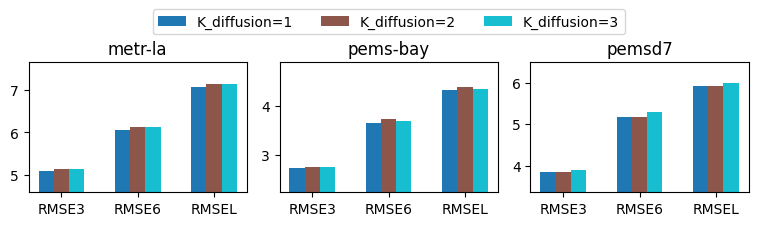

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the bar plots
datasets = ['metr-la', 'pems-bay', 'pemsd7']
steps = ['RMSE3', 'RMSE6', 'RMSEL']
kdif_labels = ['K_diffusion=1', 'K_diffusion=2', 'K_diffusion=3']

metr_la = [
    [5.09, 6.06, 7.06],  # metr-la, Kdif1
    [5.13, 6.12, 7.15],  # metr-la, Kdif2
    [5.14, 6.12, 7.15],  # metr-la, Kdif3
]

pems_ba = [
    [2.73, 3.66, 4.34],  # pems-ba, Kdif1
    [2.75, 3.73, 4.40],  # pems-ba, Kdif2
    [2.75, 3.69, 4.35],  # pems-ba, Kdif3
]

pemsd7 = [
    [3.86, 5.18, 5.92],  # pemsd7, Kdif1
    [3.86, 5.18, 5.92],  # pemsd7, Kdif2
    [3.90, 5.29, 5.99]   # pemsd7, Kdif3
]

data = [metr_la, pems_ba, pemsd7]

# Creating the bar plots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8, 2))

colors = plt.cm.tab10(np.linspace(0, 1, len(kdif_labels)))

for i in range(len(datasets)):
    
    y_min = np.inf  # Initialize minimum y-axis value
    y_max = -np.inf  # Initialize maximum y-axis value

    for j in range(len(kdif_labels)):
        axs[i].bar(np.arange(len(steps)) + j*0.2 - 0.2, data[i][j], width=0.2, align='center', label=kdif_labels[j], color=colors[j])

    axs[i].set_title(datasets[i])
#     axs[i].set_xlabel('Step')
#     axs[i].set_ylabel('RMSE')
    axs[i].set_xticks(np.arange(len(steps)))
    axs[i].set_xticklabels(steps)
        
    
    # Update y-axis limits
    y_min = min(y_min, np.min(data[i]))
    y_max = max(y_max, np.max(data[i]))

    axs[i].set_ylim(y_min-.5, y_max+.5)

# Create a horizontal legend above the subplots
legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, labels=kdif_labels)
# plt.subplots_adjust(top=0.8)
fig.subplots_adjust(top=0.8, bottom=0.15, left=0.05, right=0.95, wspace=0.15)




# Save the figure with high resolution
plt.savefig('K_diffusion_bar_plots.png', dpi=300, bbox_inches='tight')

# Display the plots
plt.show()

# Display the plots
# plt.show()



In [7]:
fname2eval = dict()
fname2eval_mae = dict()

In [8]:
dcrnn_metric = {
    'metr-la': [5.38, 6.45, 7.59],
    'pems-bay': [2.95, 3.97, 4.74],
    'pemsd7': [4.209443, 5.956019, 7.139714]
}
# for q in [2, 5, 8]:
#     metric(gt_dcrnn[q, ...], pred_dcrnn[q, ...])[1]
fname2eval = dict()

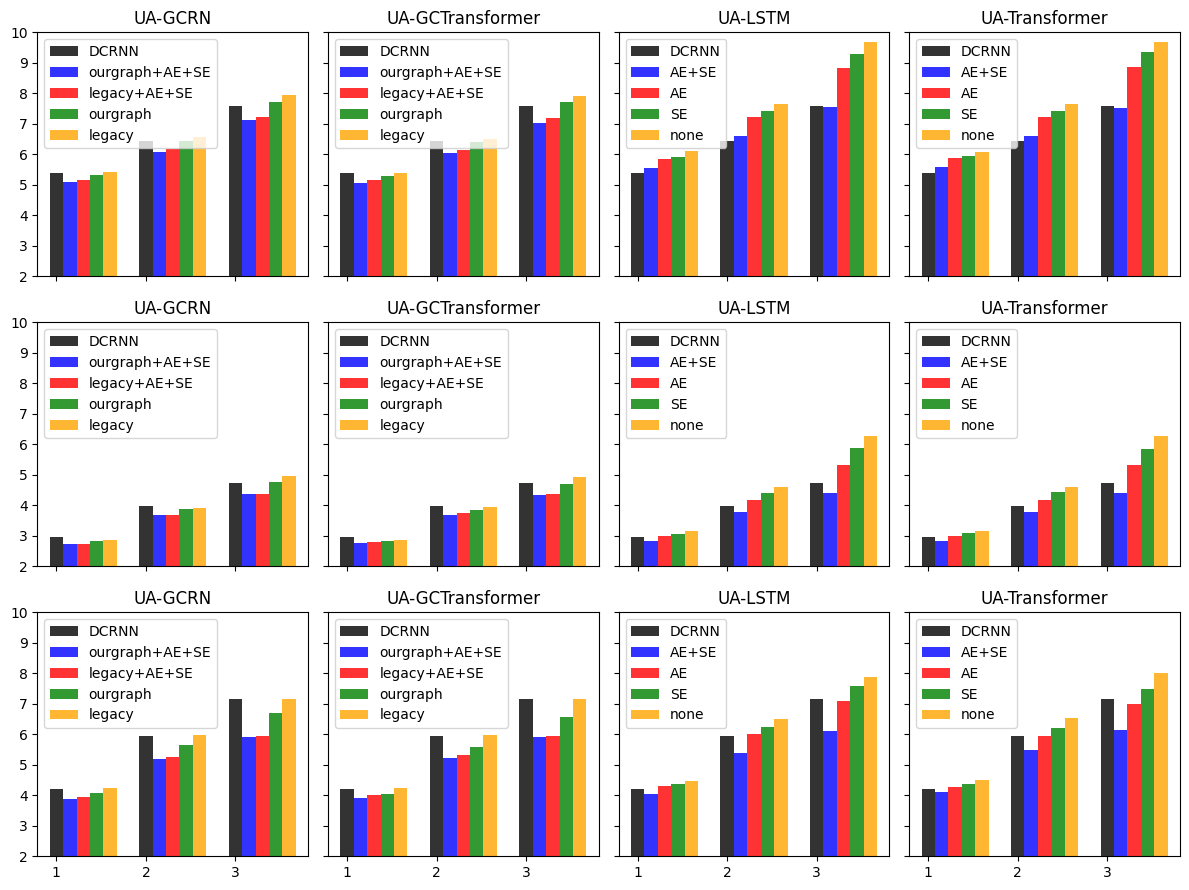

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define the datasets, models, and ablation settings
datasets = ['metr-la', 'pems-bay', 'pemsd7']
models = ['MyUAGCRN', 'MyUAGCTransformer', 'MyARLSTM', 'MyTransformer']
ablations = ['Setting 1', 'Setting 2', 'Setting 3', 'Setting 4', 'Setting 5']

# Generate random data for each subplot
np.random.seed(42)

model2title = {
    'MyUAGCRN': 'UA-GCRN', 
    'MyUAGCTransformer': 'UA-GCTransformer', 
    'MyARLSTM': 'UA-LSTM', 
    'MyTransformer': 'UA-Transformer'
}

# Create the figure and axes
fig, axs = plt.subplots(len(datasets), len(models), figsize=(12, 9), sharex=True, sharey=True)

# Iterate over datasets and models
for i, dataset in enumerate(datasets):
    ground_truth = np.load(f'./{dataset}/ground_truth.npy')
    for j, model in enumerate(models):
        # Generate random data for each ablation setting
        ablations_style = []
        if model == 'MyUAGCRN' or model == 'MyUAGCTransformer':
            ablations = []
            ablations_name = []
            ablations_style = []
            for g, a, s in reversed([('legacy', 'none', 'none'),
                            ('cooccur_dist', 'none', 'none'),
                            ('legacy', 'AE', 'SE'),
                            ('cooccur_dist', 'AE', 'SE')]):
                ablations.append((g, a, s))

                aname = []
                if g == 'legacy':
                    aname.append('legacy')
                    astyle = '--'
                else:
                    aname.append('ourgraph')
                    astyle = '-'

                acolor = 'gray'
                if a == 'AE':
                    aname.append('AE')
                    acolor = 'red'
                if s == 'SE':
                    aname.append('SE')
                    acolor = 'green'
                if a == 'AE' and s == 'SE':
                    acolor = 'blue'

                aname = '+'.join(aname)
                if len(aname) == 0:
                    aname = 'none'
                ablations_name.append(aname)
                ablations_style.append((acolor, astyle))

        elif model == 'MyARLSTM' or model == 'MyTransformer':
            ablations = []
            ablations_name = []
            ablations_style = []
            for a in ['AE', 'none']:
                for s in ['SE', 'none']:
                    ablations.append(('none', a, s))

                    aname = []
                    astyle = '-'
                    acolor = 'gray'
                    if a == 'AE':
                        aname.append('AE')
                        acolor = 'red'
                    if s == 'SE':
                        aname.append('SE')
                        acolor = 'green'
                    if a == 'AE' and s == 'SE':
                        acolor = 'blue'

                    aname = '+'.join(aname)
                    if len(aname) == 0:
                        aname = 'none'
                    ablations_name.append(aname)
                    ablations_style.append((acolor, astyle))
        else:
            ablations = []
            ablations_name = []

        if dataset != 'pemsd7':
            maxQ = 12
        else:
            maxQ = 9

#         x = np.arange(1, maxQ + 1)
        x = np.arange(1, 3 + 1)
        y = []
        for g, a, s in ablations:
            fname = f'./{dataset}/{dataset}_{model}_G-{g}_AE-{a}_SE-{s}.npy'

            try:
                if fname in fname2eval:
                    evals = fname2eval[fname]
                else:
                    prediction = np.load(fname)
                    evals = []
                    for Q in range(maxQ):
                        vvv = metric(ground_truth[:, Q, ...], prediction[:, Q, ...])
                        evals.append(vvv[1])
                    
                    fname2eval[fname] = evals
            except:
                print('not exist:', fname)
                pass
            
            if maxQ == 12:
                y.append([evals[2], evals[5], evals[11]])
            elif maxQ == 9:
                y.append([evals[2], evals[5], evals[ 8]])
                
#         print(y)

        # Plot the data
        ax = axs[i, j]
        bar_width = 0.15
        opacity = 0.8
        colors = ['blue', 'red', 'green', 'orange', 'purple']

        ax.bar(x, dcrnn_metric[dataset], bar_width, alpha=opacity, color='black', label='DCRNN')
        for k in range(len(ablations)):
            ax.bar(x + ((k+1) * bar_width), y[k], bar_width, alpha=opacity, color=colors[k], label=ablations_name[k])

        ax.set(xticks=list(range(1, 3+1)), ylim=(2, 10))
        ax.set_title(model2title[model])
        ax.legend( loc='upper left')
#         ax.legend()

        fig.tight_layout()

# Add a common x-axis label and a legend
# fig.text(0.5, 0.04, 'Q', ha='center', fontsize=14)
# fig.legend(bbox_to_anchor=(0.5, -0.1), loc='lower center', ncol=len(ablations))

# Set the overall title
# fig.suptitle('Evaluation Results', fontsize=16)

# Show the figure
plt.show()

# Set a higher DPI value (e.g., 300)
fig.set_dpi(300)

# Save the figure with high resolution
fig.savefig('figure_high_resolution.png', dpi=300)

0 0 1


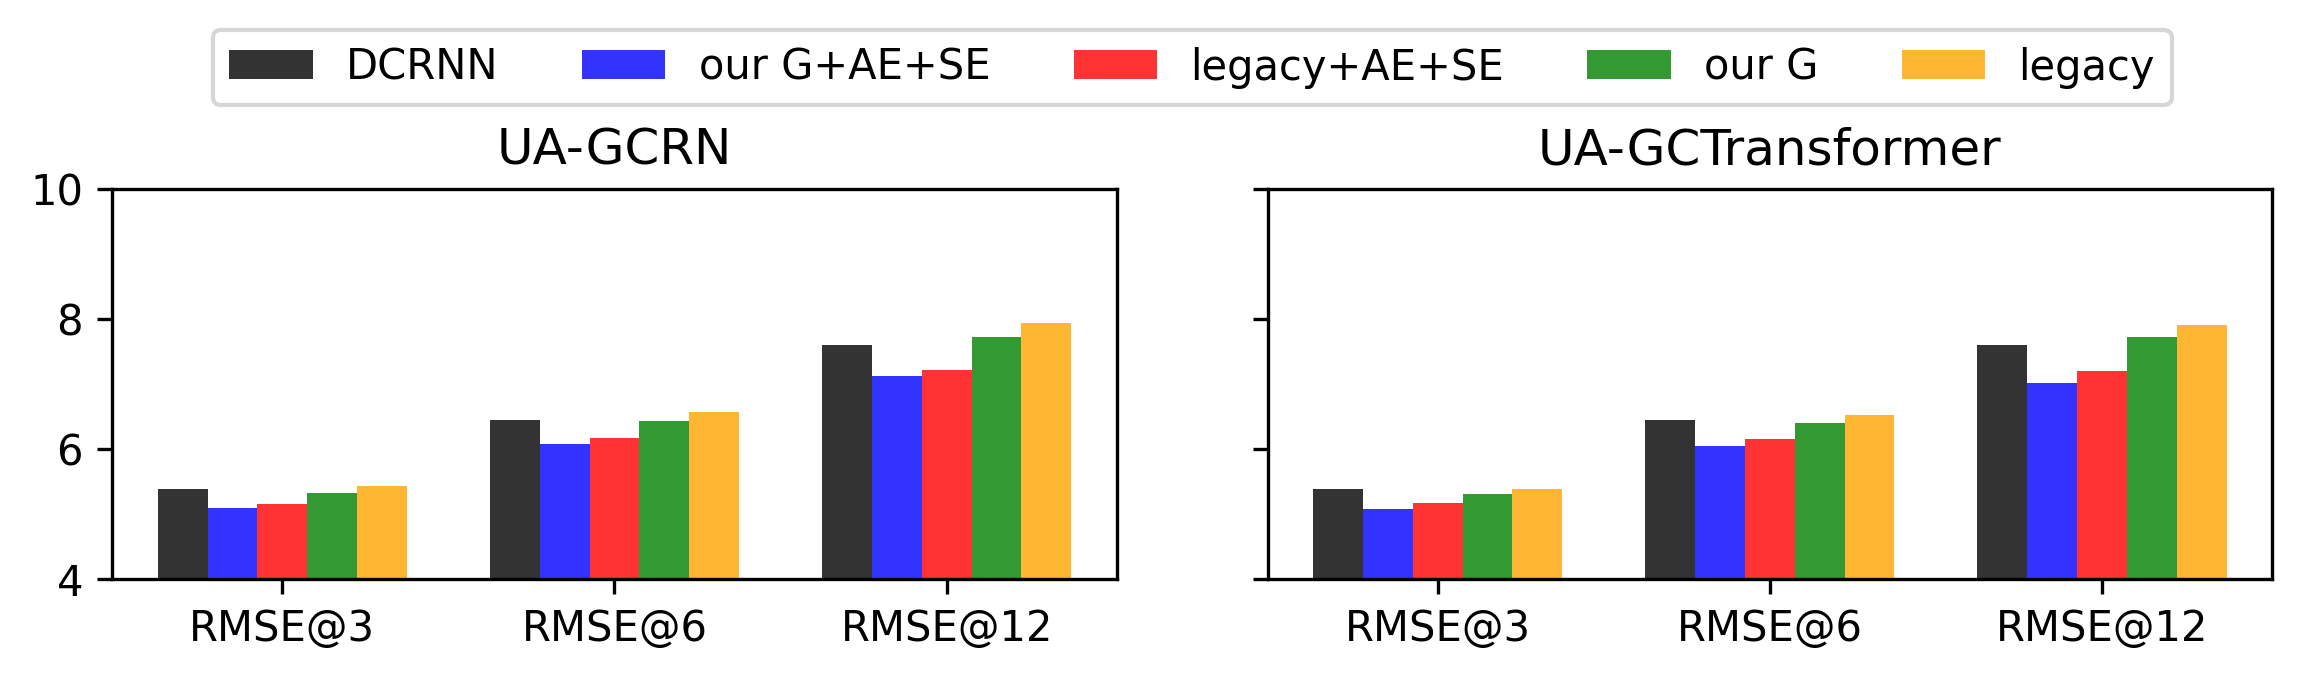

0 1 1


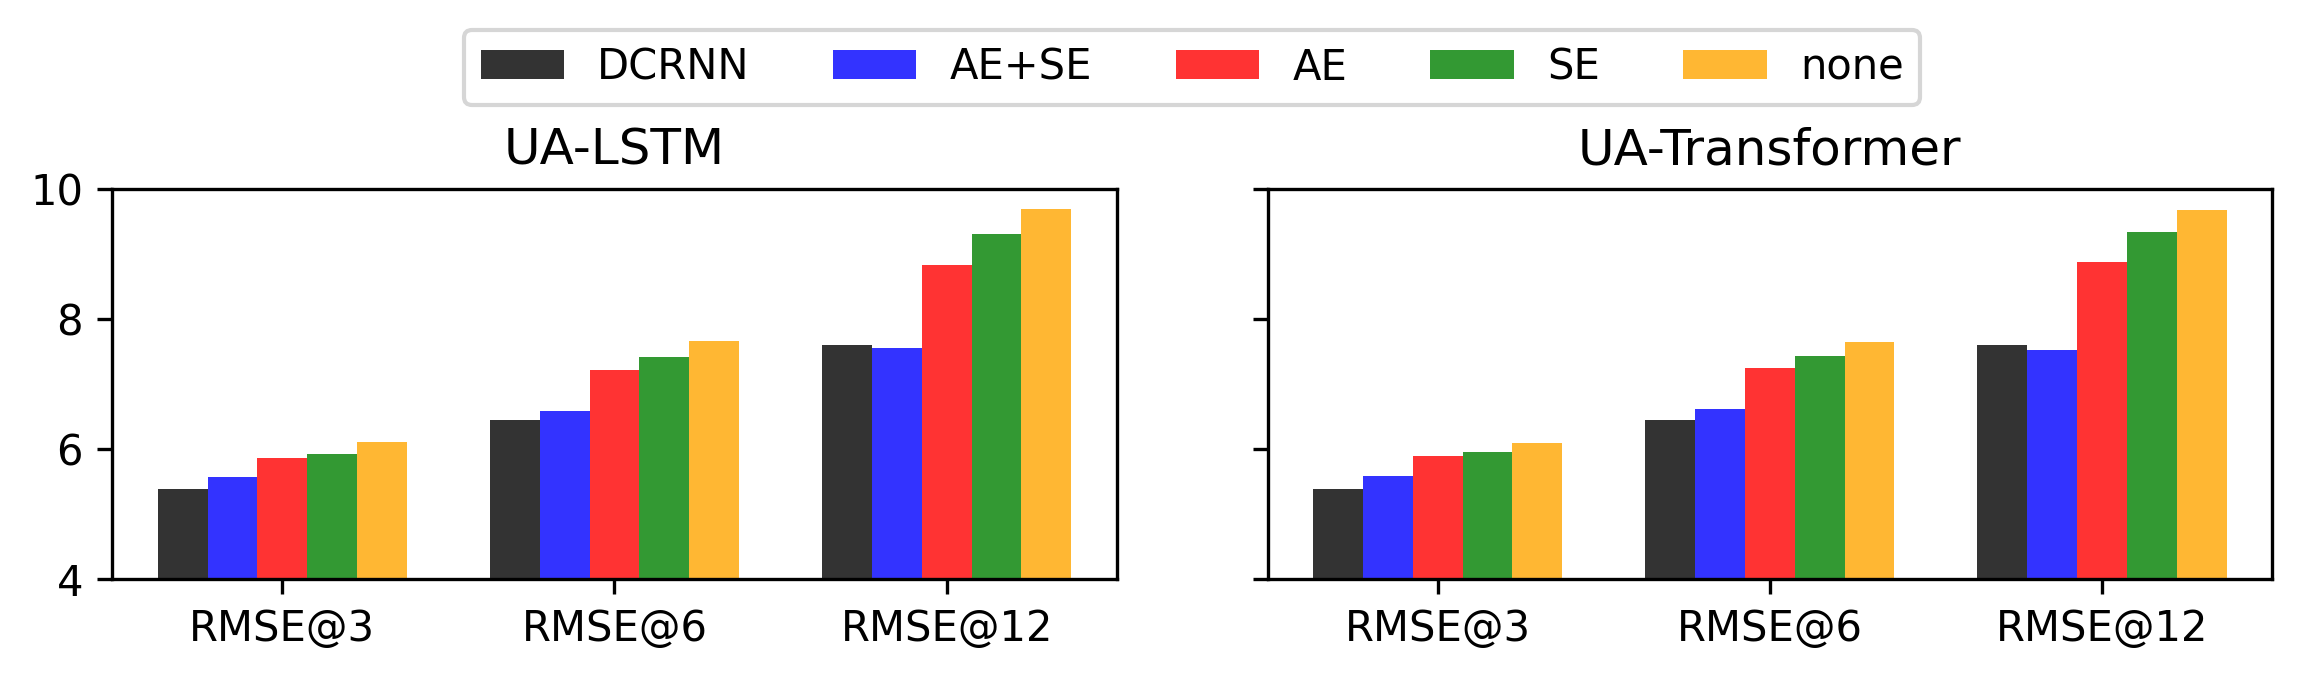

1 0 1


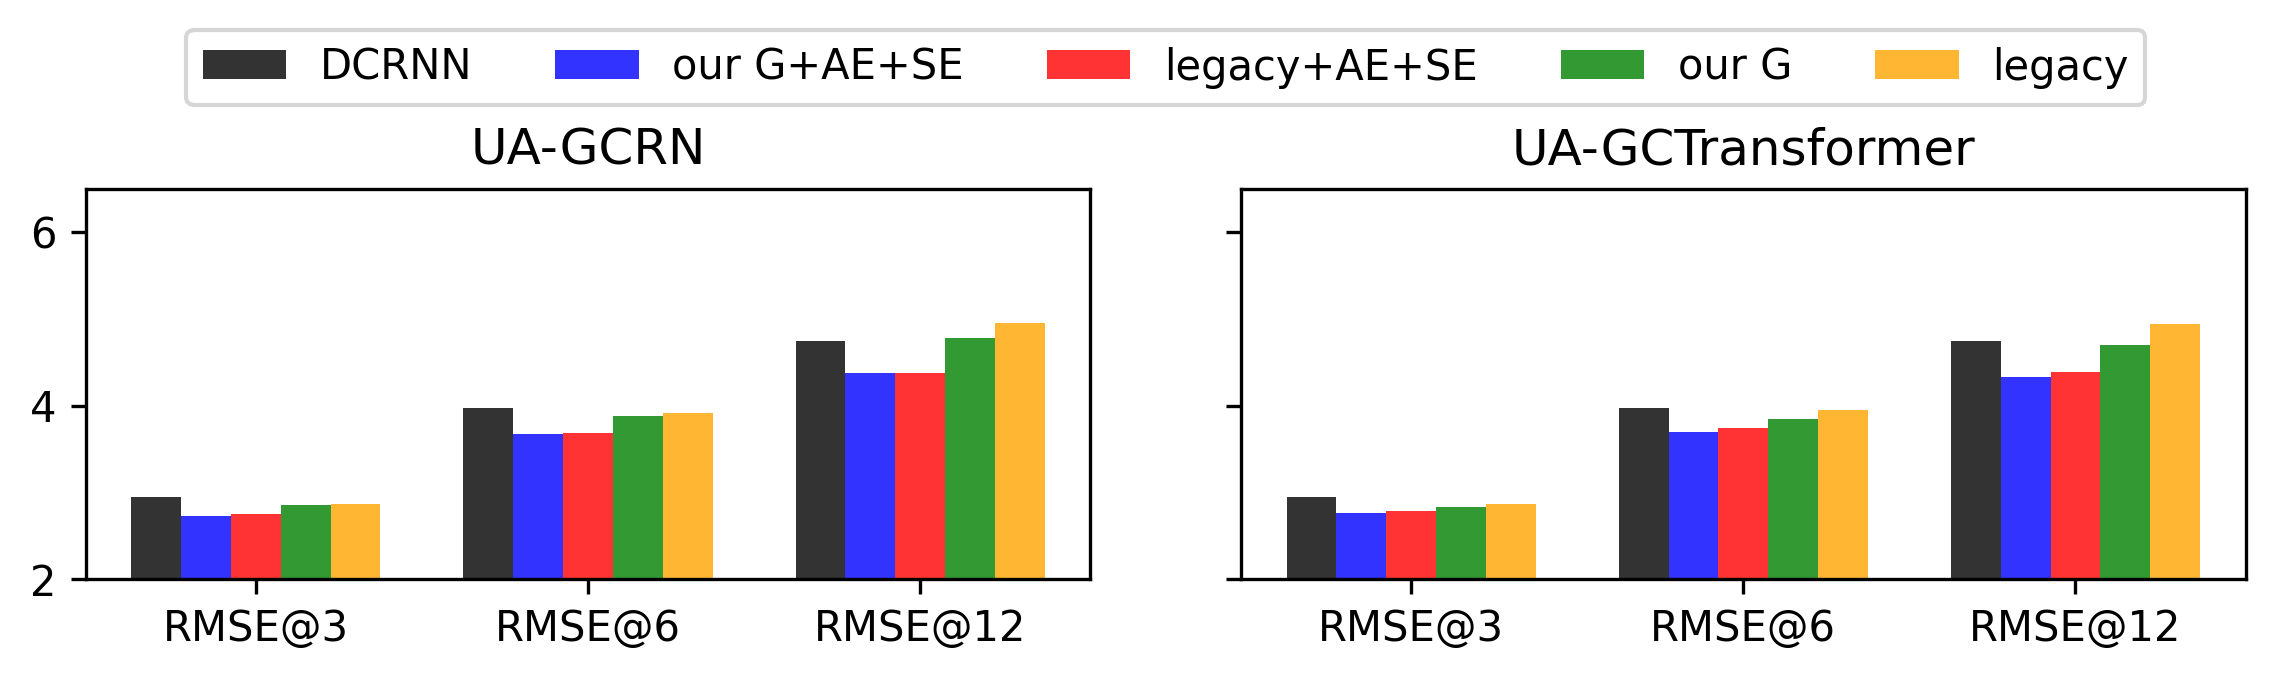

1 1 1


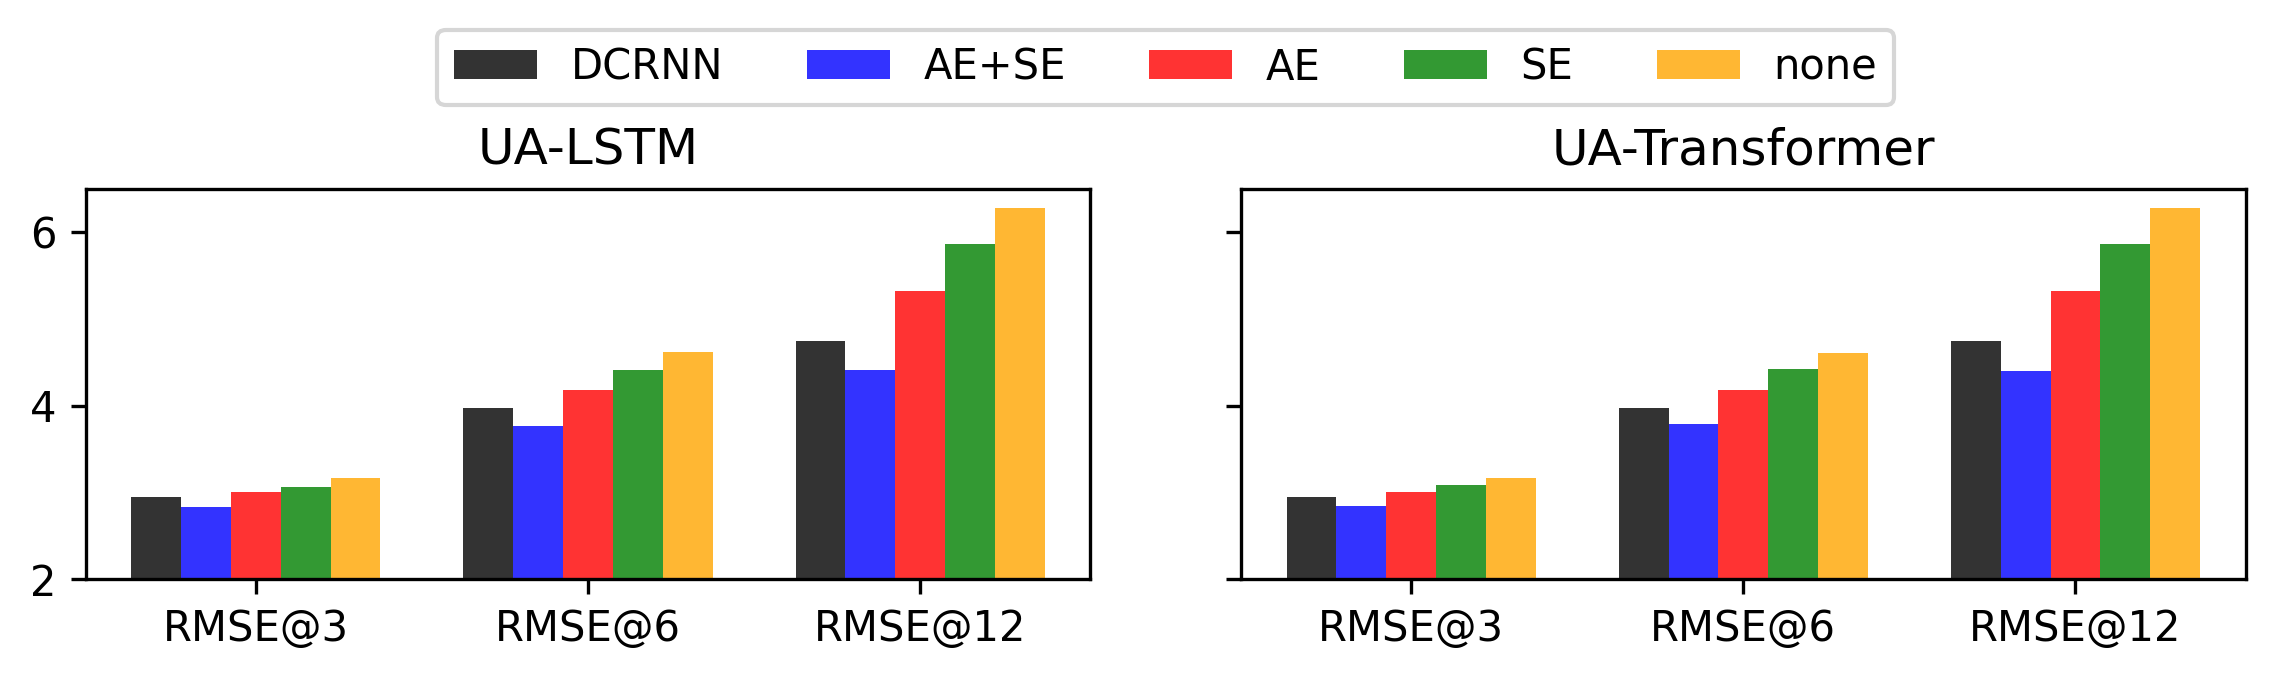

2 0 1


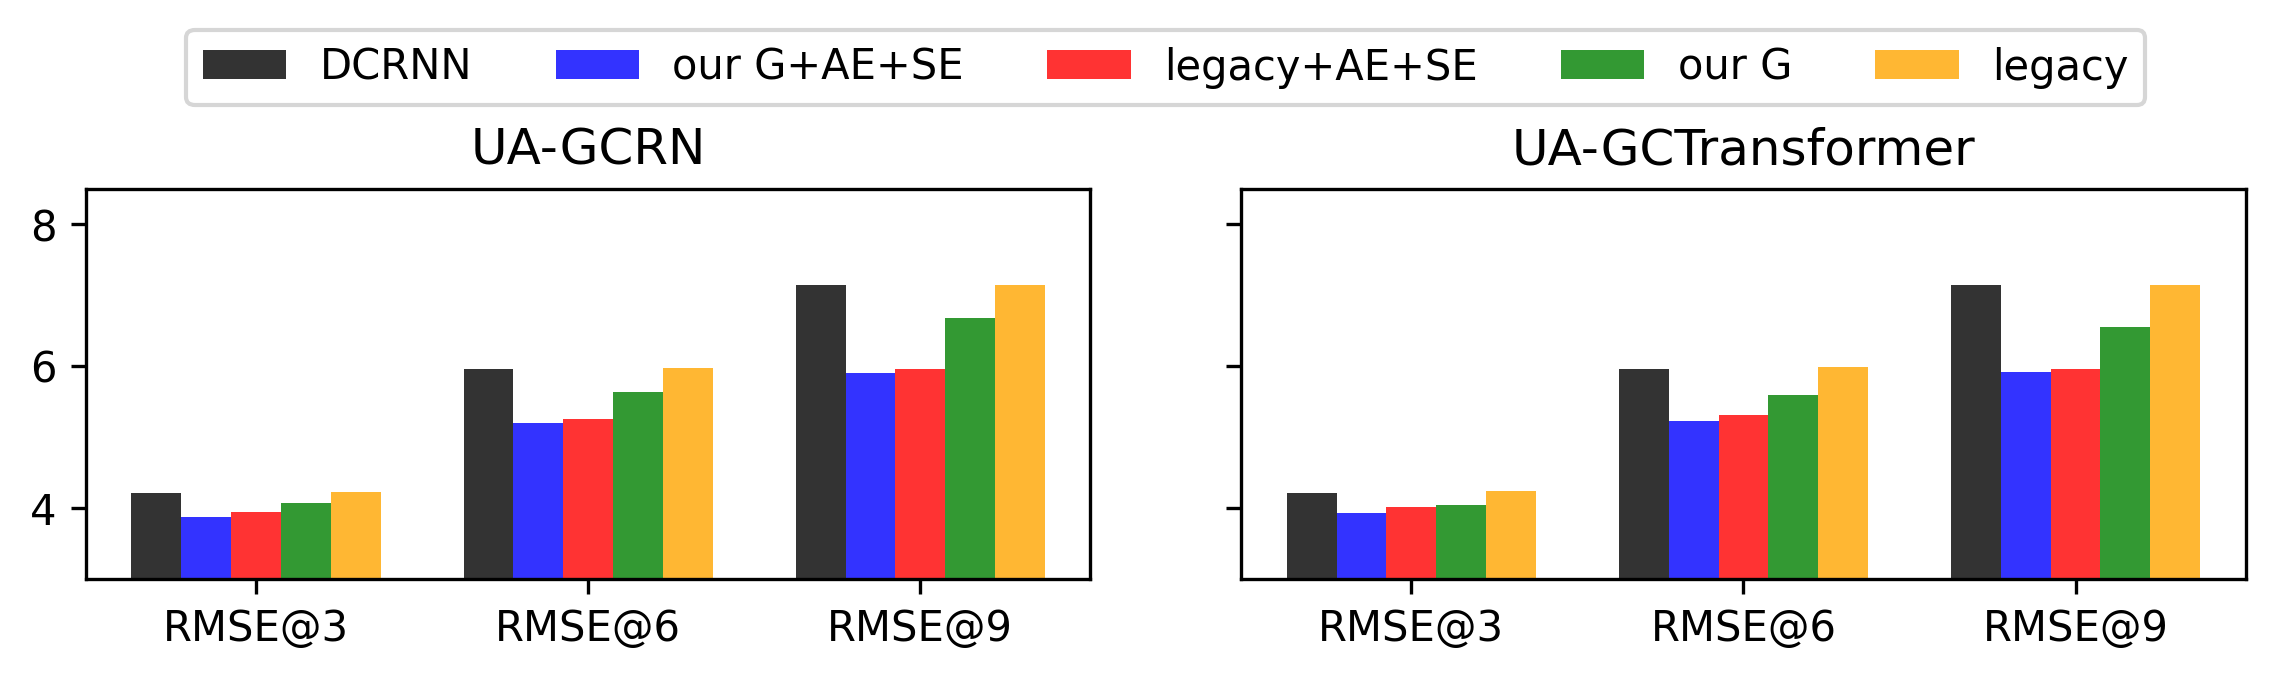

2 1 1


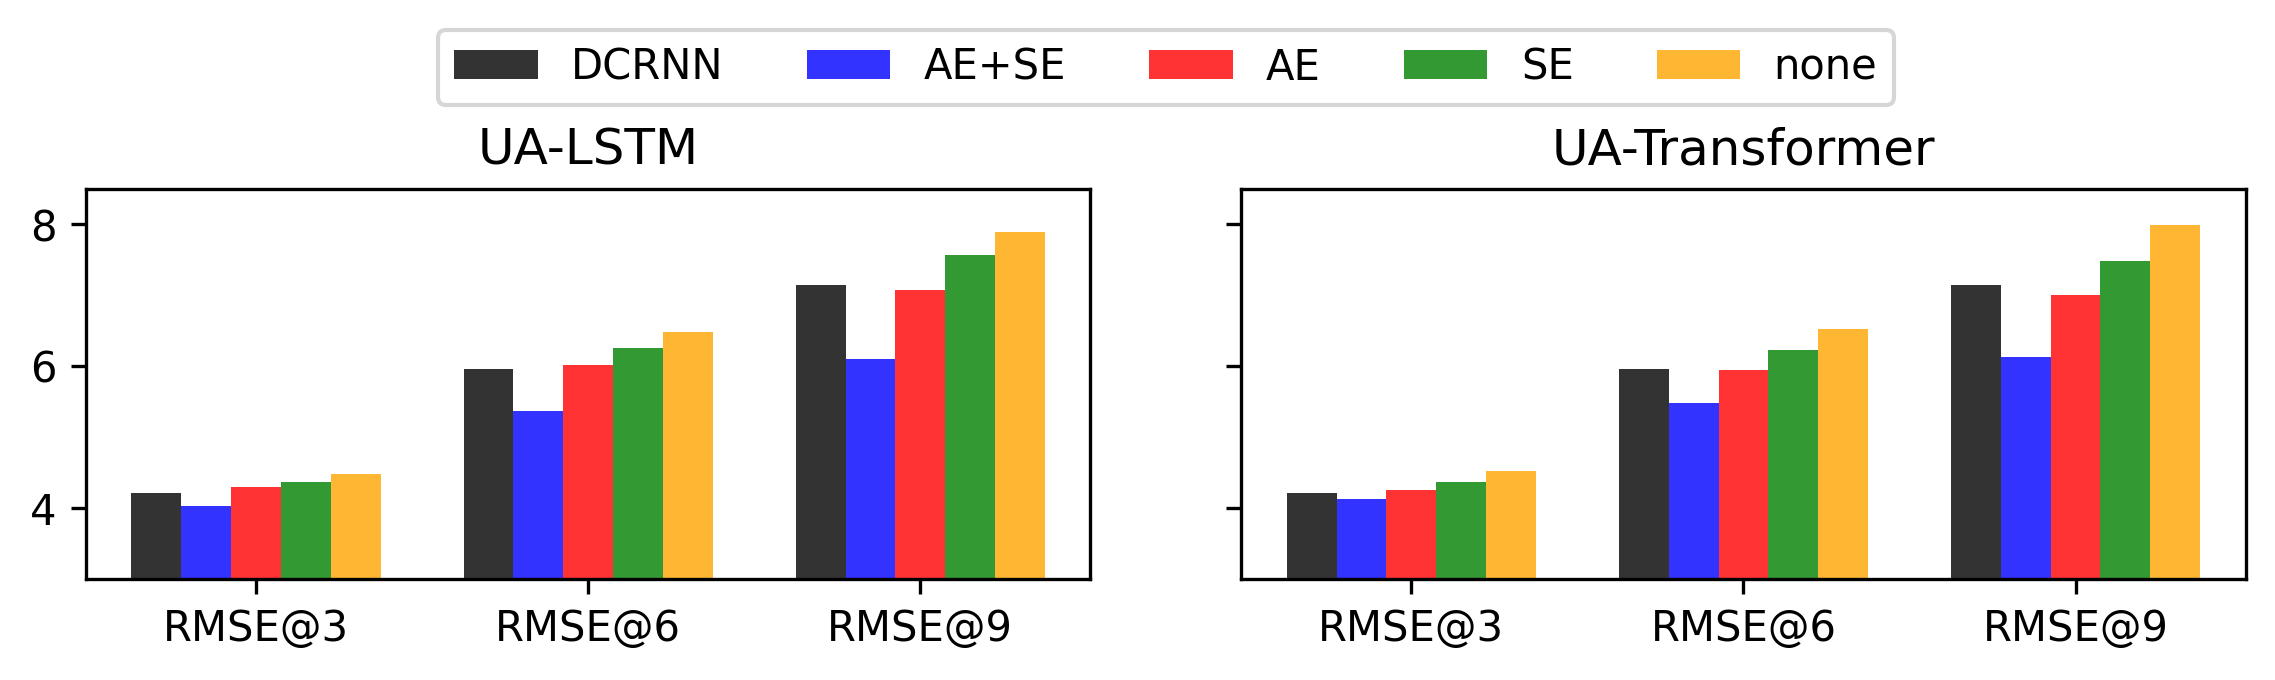

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define the datasets, models, and ablation settings
datasets = ['metr-la', 'pems-bay', 'pemsd7']
models = ['MyUAGCRN', 'MyUAGCTransformer', 'MyARLSTM', 'MyTransformer']

# Generate random data for each subplot
np.random.seed(42)

model2title = {
    'MyUAGCRN': 'UA-GCRN', 
    'MyUAGCTransformer': 'UA-GCTransformer', 
    'MyARLSTM': 'UA-LSTM', 
    'MyTransformer': 'UA-Transformer'
}



# Iterate over datasets and models
for i, dataset in enumerate(datasets):
    
    ground_truth = np.load(f'./{dataset}/ground_truth.npy')
    
    model_group = [['MyUAGCRN', 'MyUAGCTransformer'], ['MyARLSTM', 'MyTransformer']]
    
    for m, models in enumerate(model_group):
        fig, axs = plt.subplots(1, 2, figsize=(8, 2), sharex=True, sharey=True)
        for j, model in enumerate(models):
            ax = axs[j]
            
            # Generate random data for each ablation setting
            ablations_style = []
            if model == 'MyUAGCRN' or model == 'MyUAGCTransformer':
                ablations = []
                ablations_name = []
                ablations_style = []
                for g, a, s in reversed([('legacy', 'none', 'none'),
                                ('cooccur_dist', 'none', 'none'),
                                ('legacy', 'AE', 'SE'),
                                ('cooccur_dist', 'AE', 'SE')]):
                    ablations.append((g, a, s))

                    aname = []
                    if g == 'legacy':
                        aname.append('legacy')
                        astyle = '--'
                    else:
                        aname.append('our G')
                        astyle = '-'

                    acolor = 'gray'
                    if a == 'AE':
                        aname.append('AE')
                        acolor = 'red'
                    if s == 'SE':
                        aname.append('SE')
                        acolor = 'green'
                    if a == 'AE' and s == 'SE':
                        acolor = 'blue'

                    aname = '+'.join(aname)
                    if len(aname) == 0:
                        aname = 'none'
                    ablations_name.append(aname)
                    ablations_style.append((acolor, astyle))

            elif model == 'MyARLSTM' or model == 'MyTransformer':
                ablations = []
                ablations_name = []
                ablations_style = []
                for a in ['AE', 'none']:
                    for s in ['SE', 'none']:
                        ablations.append(('none', a, s))

                        aname = []
                        astyle = '-'
                        acolor = 'gray'
                        if a == 'AE':
                            aname.append('AE')
                            acolor = 'red'
                        if s == 'SE':
                            aname.append('SE')
                            acolor = 'green'
                        if a == 'AE' and s == 'SE':
                            acolor = 'blue'

                        aname = '+'.join(aname)
                        if len(aname) == 0:
                            aname = 'none'
                        ablations_name.append(aname)
                        ablations_style.append((acolor, astyle))
            else:
                ablations = []
                ablations_name = []

            if dataset != 'pemsd7':
                maxQ = 12
            else:
                maxQ = 9

            x = np.arange(1, 3 + 1)
            y = []
            for g, a, s in ablations:
                fname = f'./{dataset}/{dataset}_{model}_G-{g}_AE-{a}_SE-{s}.npy'

                try:
                    if fname in fname2eval:
                        evals = fname2eval[fname]
                    else:
                        prediction = np.load(fname)
                        evals = []
                        for Q in range(maxQ):
                            vvv = metric(ground_truth[:, Q, ...], prediction[:, Q, ...])
                            evals.append(vvv[1])

                        fname2eval[fname] = evals
                except:
                    print('not exist:', fname)
                    pass

                if maxQ == 12:
                    y.append([evals[2], evals[5], evals[11]])
                elif maxQ == 9:
                    y.append([evals[2], evals[5], evals[8]])

            # Plot the data
            bar_width = 0.15
            opacity = 0.8
            colors = ['blue', 'red', 'green', 'orange', 'purple']

            ax.bar(x- bar_width*2, dcrnn_metric[dataset], bar_width, alpha=opacity, color='black', label='DCRNN')
            for k in range(len(ablations)):
                ax.bar(x + ((k + 1) * bar_width) - bar_width*2, y[k], bar_width, alpha=opacity, color=colors[k], label=ablations_name[k])

            # Set subplot title and adjust spacing
            if dataset == 'metr-la':
                ax.set(ylim=(4, 10))
                ax.set(xticks=list(range(1, 3+1)), xticklabels=['RMSE@3', 'RMSE@6', 'RMSE@12'])
            elif dataset == 'pems-bay':
                ax.set(ylim=(2, 6.5))
                ax.set(xticks=list(range(1, 3+1)),  xticklabels=['RMSE@3', 'RMSE@6', 'RMSE@12'])
            else:
                ax.set(ylim=(3, 8.5))
                ax.set(xticks=list(range(1, 3+1)),  xticklabels=['RMSE@3', 'RMSE@6', 'RMSE@9'])

            ax.set_title(model2title[model])
#             ax.legend(loc='upper left')

            fig.tight_layout()

        # Add common x-axis labels and a legend
#         fig.text(0.5, 0.04, 'Q', ha='center', fontsize=14)
#         fig.legend(bbox_to_anchor=(0.5, -0.1), loc='lower center', ncol=len(ablations))
        legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(ablations_name)+1, labels=['DCRNN'] + ablations_name)
        fig.subplots_adjust(top=0.8, bottom=0.15, left=0.05, right=0.95, wspace=0.15)
        # Set the overall title
#         fig.suptitle('Evaluation Results', fontsize=16)

        # Set a higher DPI value (e.g., 300)
        fig.set_dpi(300)

        # Save the figure with high resolution
        fig.savefig(f'ablation-{i}x{m}.png', dpi=300, bbox_inches='tight')

        # Show the figure
        print(i, m, j)
        plt.show()
